# Test Harness Development Notebook

In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
from sklearn.preprocessing import LabelEncoder

%load_ext autoreload
%autoreload 2

### Load & Prepare Data

In [2]:
data = pd.read_csv("../data/electricity-normalized.csv")

In [3]:
# specify columns to keep and if categorical
cols = (
    ("day", True),
    ("period", True),
    ("nswdemand", False),
    ("vicdemand", False),
    ("transfer", False),
    ("class", True),
)

data_clean = data[[col for col, _ in cols]].copy(deep=True)

# label encode categorical
catcols = (col for col, iscat in cols if iscat)

for col in catcols:
    data_clean[col] = LabelEncoder().fit_transform(data_clean[col])

# convert to categorical
def categorize(df, cols):
    catcols = (col for col, iscat in cols if iscat)
    for col in catcols:
        df[col] = pd.Categorical(df[col])
    return df


data_clean = categorize(data_clean, cols)


In [4]:
data_clean

,day,period,nswdemand,vicdemand,transfer,class
0,1,0,0.439155,0.422915,0.414912,1
1,1,1,0.415055,0.422915,0.414912,1
2,1,2,0.385004,0.422915,0.414912,1
3,1,3,0.314639,0.422915,0.414912,1
4,1,4,0.251116,0.422915,0.414912,0
...,...,...,...,...,...,...
45307,6,43,0.340672,0.255049,0.405263,0
45308,6,44,0.355549,0.241326,0.420614,0
45309,6,45,0.340970,0.247799,0.362281,0
45310,6,46,0.329366,0.345417,0.206579,1


### Experiment Development

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from test_harness.utils.utils import plot_experiment_error, plot_multiple_experiments

from test_harness.datasets.dataset import Dataset
from test_harness.experiments.experiment import Experiment
from test_harness.experiments.baseline_experiment import BaselineExperiment
from test_harness.experiments.topline_experiment import ToplineExperiment

In [14]:
column_mapping = {
    "target": "class",
    "numerical_features": ["nswdemand", "vicdemand"],
    "categorical_features": ["day", "period"],
}

ED_dataset = Dataset(
    full_df=data_clean, column_mapping=column_mapping, window_size=2500
)
model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = SVC(C=0.8, random_state=42)

In [15]:
baseline = BaselineExperiment(model=model, dataset=ED_dataset)
topline = ToplineExperiment(model=model, dataset=ED_dataset)

baseline.run()
topline.run()

# plot_experiment_error(baseline);
# plot_experiment_error(topline);

<AxesSubplot:title={'center':'Overall Score by Experiment'}, xlabel='0'>

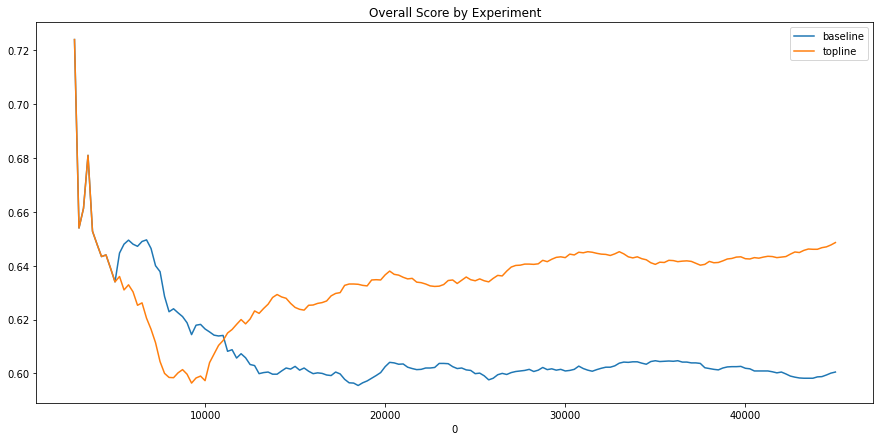

In [16]:
exps = [baseline, topline]
plot_multiple_experiments(exps)

In [ ]:
experiments = [{'name': 'baseline', 'experiment': BaselineExperiment(model=model, dataset=ED_dataset)},
               {'name': 'topline', 'experiment': ToplineExperiment(model=model, dataset=ED_dataset)}]